In [1]:
%matplotlib inline
import logging
import Euclid
import matplotlib.pyplot as plt
import numpy as np

from collections import namedtuple
from glob import glob
from matplotlib import colors
from astropy.table import Table
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde

%elogin
%erun Elements 5.10

sys.path.append('/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/nnpz/python/')

%load_ext autoreload
%autoreload 2
from nnpz.reference_sample.ReferenceSample import ReferenceSample

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
ref_sample = ReferenceSample('/home/aalvarez/Work/Data/SC8/PHZ_Calibration/MergeReferenceSampleDirs/reference_sample_dir.dir/')

INFO    : Found provider PdzProvider
2020-08-13T16:59:50CEST ReferenceSample  INFO : Found provider PdzProvider
INFO    : Found provider SedProvider
2020-08-13T16:59:51CEST ReferenceSample  INFO : Found provider SedProvider
INFO    : Found provider MontecarloProvider
2020-08-13T16:59:51CEST ReferenceSample  INFO : Found provider MontecarloProvider


# Visualization of the reference sample

In [3]:
obj_ids = list(ref_sample.getIds())

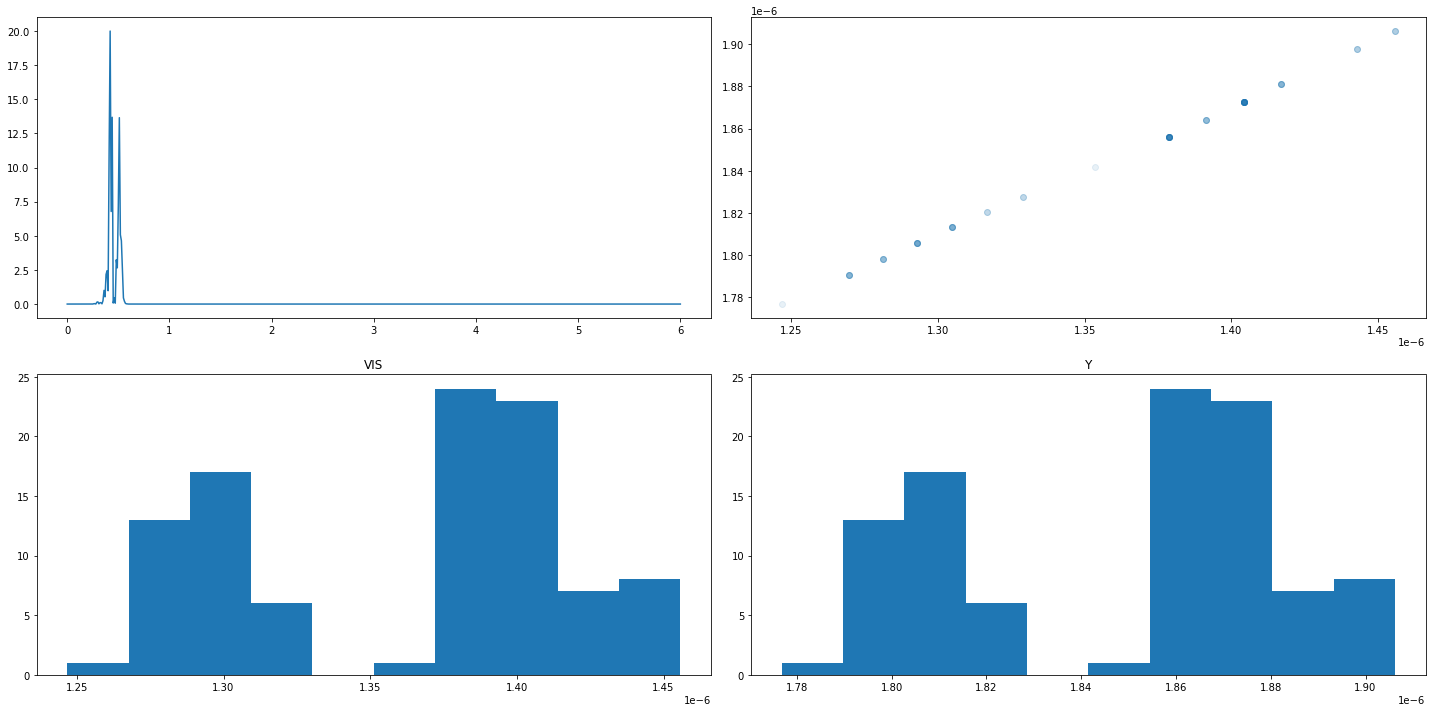

In [4]:
pdz = ref_sample.getPdzData(obj_ids[55])
pp = ref_sample.getData('MontecarloPhotometry', obj_ids[55])
names = ref_sample.getProvider('MontecarloPhotometry').extra['names']

fig, axes = plt.subplots(ncols=2, nrows=2)
axes[0, 0].plot(pdz[:,0], pdz[:,1])
axes[0, 1].scatter(pp[:,0], pp[:,1], alpha=0.1)
axes[1, 0].hist(pp[:,0])
axes[1, 0].set_title(names[0])
axes[1, 1].hist(pp[:,1])
axes[1, 1].set_title(names[1])
plt.tight_layout()

# For a given target object

In [7]:
target = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/Nnpz/output_file.fits', hdu=1)
bins = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/Nnpz/output_file.fits', hdu=2)

In [11]:
names

['VIS',
 'Y',
 'IB427',
 'IB464',
 'IB484',
 'IB505',
 'IB527',
 'IB574',
 'IB624',
 'IB679',
 'IB709',
 'IB738',
 'IB767',
 'IB827']

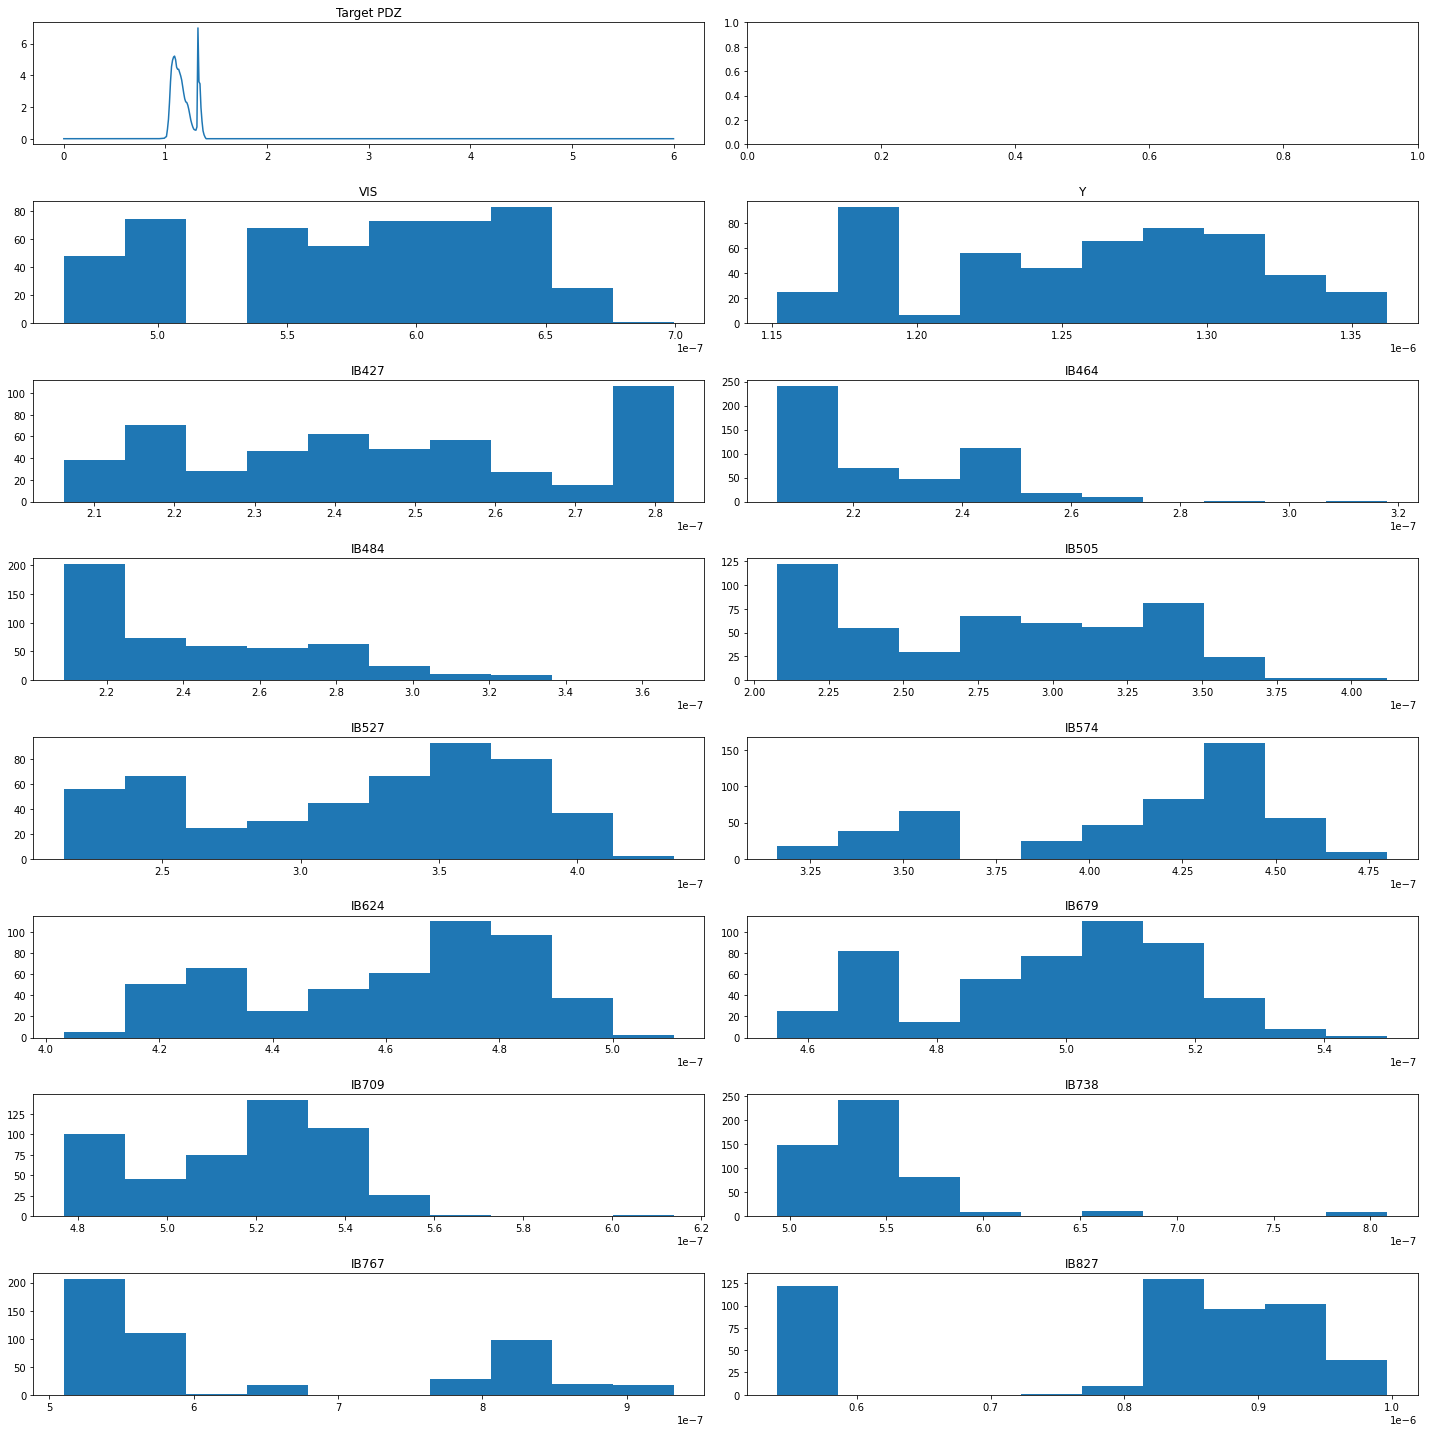

In [17]:
target_obj = target[100]

ncols = 2
nrows = 1 + len(names)//2

fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=(20,20))
axes[0, 0].plot(bins['BINS_PDF'], target_obj['REDSHIFT_PDF'])
axes[0, 0].set_title('Target PDZ')

tw = np.sum(target_obj['NEIGHBOR_WEIGHTS'])
re_pdz = np.zeros(bins['BINS_PDF'].shape)
all_samples = []
for n, w in zip(target_obj['NEIGHBOR_IDS'], target_obj['NEIGHBOR_WEIGHTS']):
    all_samples.append(ref_sample.getData('MontecarloPhotometry', n))

all_weights = np.repeat(target_obj['NEIGHBOR_WEIGHTS'], all_samples[0].shape[0])
all_samples = np.concatenate(all_samples)

choice = np.random.choice(len(all_samples), size=500, p=all_weights/np.sum(all_weights))

for i, (name, ax) in enumerate(zip(names, axes[1:].ravel())):
    ax.hist(all_samples[choice, i])
    ax.set_title(name)

plt.tight_layout()